# Investigating the Impact of AI Assistance on Career Readiness

This project explores whether the advent of AI tools, such as ChatGPT, Grammarly, and LinkedIn AI features, has significantly influenced career readiness among young adults. As AI becomes a ubiquitous part of professional and academic environments, concerns have been raised about its potential to either enhance skills or foster dependence, weakening overall career preparedness. This study aims to address these questions using a data-driven approach.

---
The research question:

*"Has the advent of AI assistance affected career readiness?"*

---

However, before all of that it is important to discuss data collection methods and EDA

&nbsp;

## **Data Collection Methods**

### **Sampling Frame**
The sampling frame for this study comprised young adults aged 18-25, primarily college students and recent graduates. The sample was selected to reflect a population actively engaging with AI tools in academic and career-related activities, ensuring the data gathered is relevant to the research question on career readiness and AI dependence.

### **Sampling Technique**
The survey employed a **non-probability convenience sampling technique**, leveraging the researcher's network of peers, friends, and college students. This method was chosen due to the accessibility of respondents within the target demographic and the exploratory nature of the study. The survey was circulated via online platforms such as WhatsApp, email, and social media, ensuring a wide reach within the sampling frame.


### **Overview of Information Obtained**

The survey captured a range of data points categorized into the following sections:

##### 1. **Demographics**
- **Age Bracket**: Respondents' age groups were categorized into 18-21 and 22-25, providing insights into age-related trends in AI usage and career readiness.
- **Field of Study or Career**: Participants represented diverse fields such as Computer Science, Management, and Finance, allowing for analysis of AI's impact across disciplines.
- **Educational or Career Status**: Most respondents identified as college students, reflecting a population actively preparing for their careers.

##### 2. **AI Tool Usage**
- **Frequency**: Usage patterns ranged from daily to occasional, highlighting varying levels of dependence on AI tools.
- **Types of Tools**: Popular tools included ChatGPT, Grammarly, and GitHub Copilot, showcasing a preference for tools aiding in writing, coding, and productivity.
- **Purpose**: Respondents primarily used AI for writing assignments, debugging code, and preparing for exams, indicating a broad spectrum of academic and career-related applications.

##### 3. **Career Readiness**
- **Self-Assessment**: Participants rated their career readiness on a scale of 1 to 5, with responses providing a quantitative measure for analysis.
- **Impact of AI Tools**: Ratings on how AI tools improved career readiness were similarly scaled, allowing for correlation analysis.
- **Improved Skills**: Commonly cited improvements included writing, communication, and technical skills.
- **Weakened Skills**: Concerns were raised about diminishing creativity, problem-solving, and research abilities.

##### 4. **Confidence Without AI**
- Respondents rated their confidence in solving career-related problems without AI, providing a critical measure of self-reliance versus dependence on AI tools.


### **Key Insights from the Data**
The collected data provides a comprehensive overview of how young adults interact with AI tools, their perceptions of skill improvement or weakening, and their overall readiness for careers. This dataset forms the foundation for statistical testing and machine learning analyses to explore the relationship between AI usage and career preparedness.



&nbsp;

## **Loading and Cleaning the Data**


Here are the four data preparation steps:

1. **Standardize Column Names**:  
   Renamed dataset columns to concise, easy-to-read names for better usability.

2. **Process Multi-Select Fields**:  
   Extracted unique skills from "Skills Improved" and "Skills Weakened" responses. Created binary columns (`1` for selected, `0` for not selected) for each skill.

3. **Encode Categorical Variables**:  
   Converted "AI Usage Frequency" into numerical values:
   - `Rarely = 1`, `Occasionally = 2`, `Weekly = 3`, `Daily = 4`.


However, there was an issue with the data, Business/Management and Management were listed separately so before doing anything else, I will merge them in the data frame

In [103]:
import pandas as pd


data = pd.read_csv("readiness.csv")

# Merge "Business/Management" and "Management" into a single category
data["What is your field of study or career?"] = data["What is your field of study or career?"].replace(
    {"Management": "Business / Management"}
)

data["What is your field of study or career?"] = data["What is your field of study or career?"].replace(
    {"Natural Sciences (e.g., Physics, Chemistry, Biology)":"Natural Sciences"}
)

# Step 1

data.columns = [
    "Timestamp",
    "Age_Bracket",
    "Field_of_Study",
    "Educational_Status",
    "AI_Usage_Frequency",
    "AI_Tools_Used",
    "AI_Usage_Purpose",
    "Career_Readiness_Score",
    "Skill_Improvement_Score",
    "Skills_Improved",
    "Skills_Weakened",
    "Confidence_Without_AI"
]



# Step 2 

def process_multiselect(column_data):
    """Splits multi-select responses into unique skills as binary columns."""

    # Extract unique skills across all responses
    unique_skills = set()
    for entry in column_data.dropna():
        unique_skills.update([skill.strip() for skill in entry.split(",")])

    # Create binary columns for each skill
    skills_df = pd.DataFrame()
    for skill in unique_skills:
        skills_df[skill] = column_data.apply(lambda x: int(skill in x) if isinstance(x, str) else 0)

    return skills_df

# Apply processing for both skills columns
improved_skills_df = process_multiselect(data["Skills_Improved"])
weakened_skills_df = process_multiselect(data["Skills_Weakened"])



# Step 3

# Encoding "AI Usage Frequency" as ordinal values
usage_mapping = {"Rarely": 1, "Occasionally": 2, "Weekly": 3, "Daily": 4}
data["AI_Usage_Frequency_Encoded"] = data["AI_Usage_Frequency"].map(usage_mapping)



&nbsp;

## **Exploratory Data Analysis**

### **Distribution of Data**

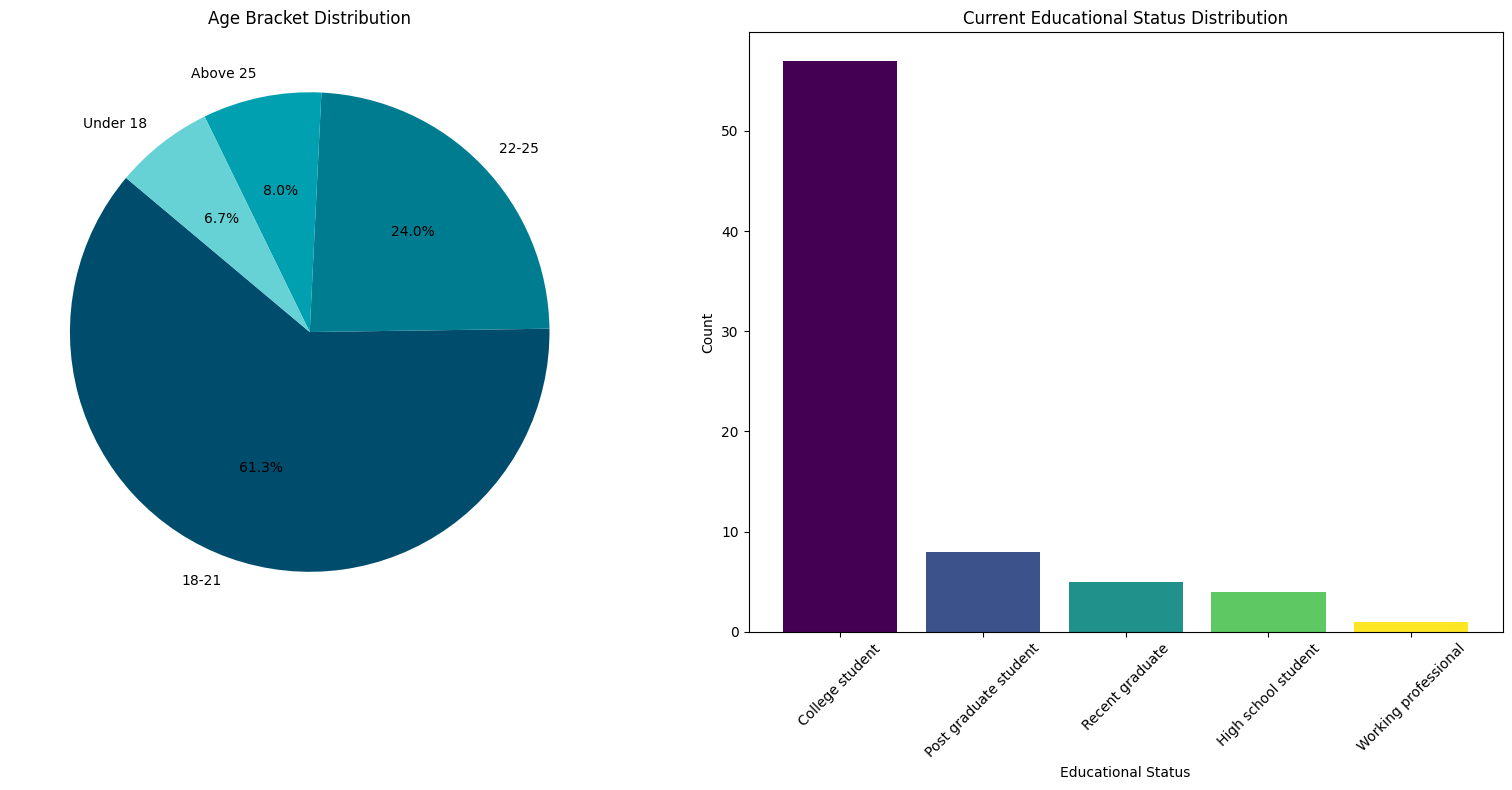

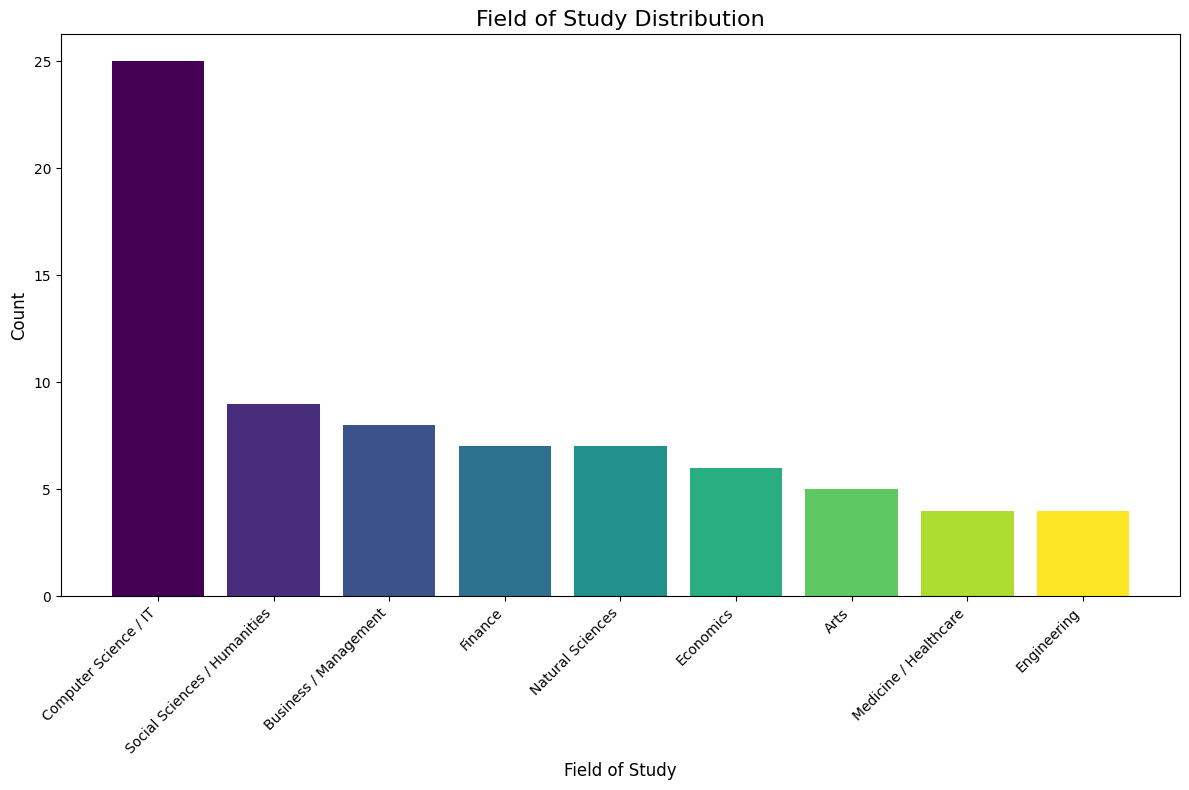

In [104]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Pie Chart and Educational Status on One Figure
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

custom_teal_colors = ['#004c6d', '#007c91', '#00a0b0', '#66d2d6']  # Dark teal to light teal

# Pie Chart for Age Bracket
age_bracket_counts = data["Age_Bracket"].value_counts()
axes[0].pie(age_bracket_counts, labels=age_bracket_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_teal_colors)
axes[0].set_title("Age Bracket Distribution")

# Educational Status Bar Graph
educational_status_counts = data["Educational_Status"].value_counts()

# Create gradient colors based on the position of the bars
num_bars = len(educational_status_counts)
colors = cm.viridis(np.linspace(0, 1, num_bars))  # Generate evenly spaced colors from the colormap

axes[1].bar(educational_status_counts.index, educational_status_counts.values, color=colors)
axes[1].set_title("Current Educational Status Distribution")
axes[1].set_xlabel("Educational Status")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Field of Study Bar Graph (Separate Figure)
field_of_study_counts = data["Field_of_Study"].value_counts()

# Create gradient colors for field of study
num_bars = len(field_of_study_counts)
colors = cm.viridis(np.linspace(0, 1, num_bars))  # Generate evenly spaced colors from the colormap

plt.figure(figsize=(12, 8))
bars = plt.bar(field_of_study_counts.index, field_of_study_counts.values, color=colors)
plt.title("Field of Study Distribution", fontsize=16)
plt.xlabel("Field of Study", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")

# No colorbar (just aesthetic gradient colors for bars)
plt.tight_layout()
plt.show()








#### **Insights**:
1. The dataset is heavily skewed towards **young college students** in the **18-21 age group**, with **Computer Science / IT** dominating as the most common field of study. This aligns well with the focus on AI tools and career readiness.
2. The relatively low representation of other educational statuses (e.g., postgraduates, working professionals) and fields (e.g., arts, medicine) limits generalizability across diverse demographics.
3. These distributions reflect a strong focus on tech-savvy, educationally active individuals likely familiar with AI tools.



### **Exploring Relationships**

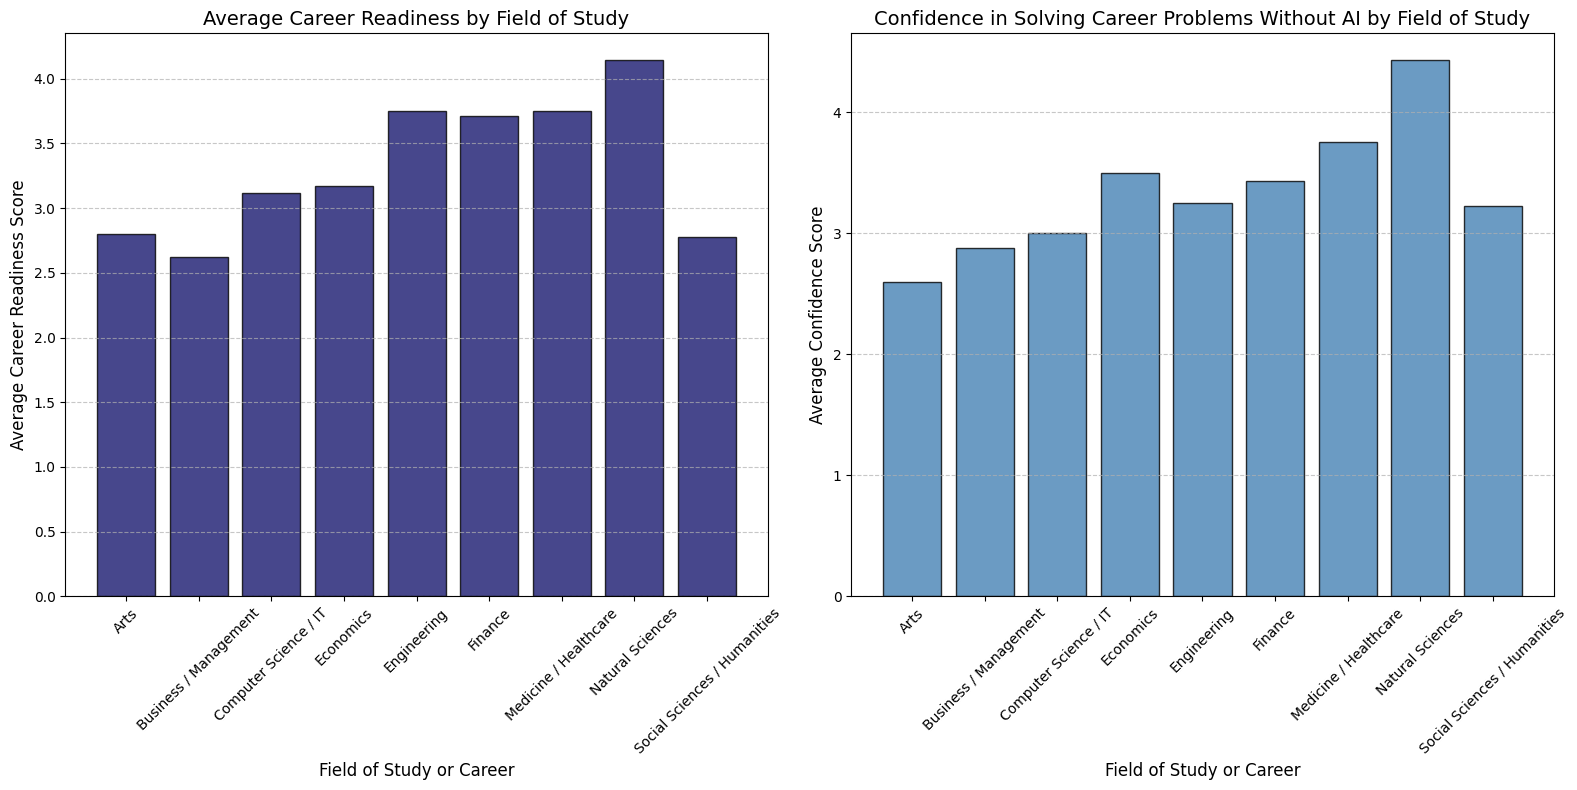

Field of Study vs Readiness and Confidence
                              Career Readiness Score  Confidence Without AI
Field_of_Study                                                             
Arts                                        2.800000               2.600000
Business / Management                       2.625000               2.875000
Computer Science / IT                       3.120000               3.000000
Economics                                   3.166667               3.500000
Engineering                                 3.750000               3.250000
Finance                                     3.714286               3.428571
Medicine / Healthcare                       3.750000               3.750000
Natural Sciences                            4.142857               4.428571
Social Sciences / Humanities                2.777778               3.222222


In [105]:
major_vs_readiness = data.groupby('Field_of_Study')[
    'Career_Readiness_Score'
].mean()

confidence_vs_field = data.groupby('Field_of_Study')[
    'Confidence_Without_AI'
].mean()

# Combine the data into a single DataFrame for display
combined_data = pd.DataFrame({
    'Career Readiness Score': major_vs_readiness,
    'Confidence Without AI': confidence_vs_field
})

# Create the figure and axes for side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Career Readiness by Field of Study
axes[0].bar(major_vs_readiness.index, major_vs_readiness, color='midnightblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Average Career Readiness by Field of Study', fontsize=14)
axes[0].set_xlabel('Field of Study or Career', fontsize=12)
axes[0].set_ylabel('Average Career Readiness Score', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Confidence Without AI by Field of Study
axes[1].bar(confidence_vs_field.index, confidence_vs_field, color='steelblue', edgecolor='black', alpha=0.8)
axes[1].set_title('Confidence in Solving Career Problems Without AI by Field of Study', fontsize=14)
axes[1].set_xlabel('Field of Study or Career', fontsize=12)
axes[1].set_ylabel('Average Confidence Score', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

# Display the combined data as a DataFrame
print("Field of Study vs Readiness and Confidence")
print(combined_data)



#### Insights 



1. **Top Performing Fields**:
   - **Natural Sciences**: Highest career readiness (4.14) and confidence without AI (4.43), reflecting strong analytical training and self-reliance.
   - **Medicine/Healthcare**: High readiness (3.75) and confidence (3.75), driven by practical, hands-on training.

2. **Technical Fields**:
   - **Engineering**: High readiness (3.75) but moderate confidence (3.25), suggesting more emphasis on independent problem-solving is needed.
   - **Computer Science/IT**: Moderate readiness (3.12) and confidence (3.0), indicating reliance on AI tools for technical tasks.

3. **Fields Needing Improvement**:
   - **Arts**: Low readiness (2.80) and confidence (2.60), reflecting gaps in independent problem-solving skills.
   - **Business/Management**: Lowest readiness (2.62) and low confidence (2.87), requiring foundational skill-building and critical thinking focus.

4. **Balanced Fields**:
   - **Finance (3.71 readiness, 3.43 confidence)** and **Economics (3.17 readiness, 3.50 confidence)** maintain solid analytical training with moderate reliance on AI.

#### Key Takeaway:
Fields with high readiness and confidence (Natural Sciences and Medicine) excel due to robust training, while Arts and Business/Management need targeted skill-building to bridge gaps. Technical fields (CS/IT, Engineering) must balance AI reliance with independent problem-solving.




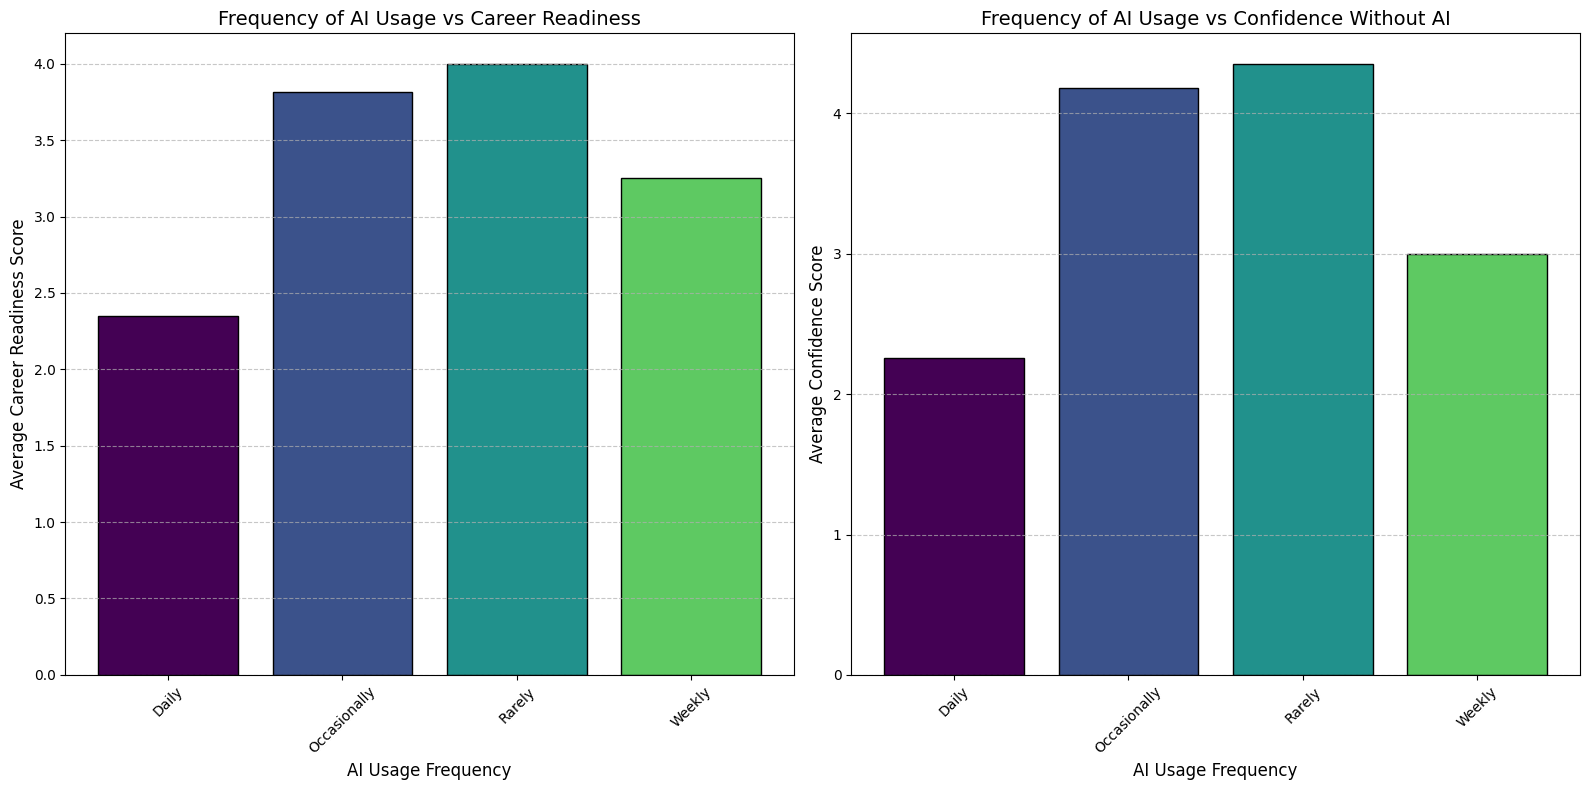

In [106]:
# Recreate the desired bar chart style for the two comparisons
import numpy as np

# Prepare the figure for the two plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Viridis colormap
cmap = plt.cm.viridis

# Plot 1: Frequency of AI usage vs Career Readiness
career_readiness = data.groupby("AI_Usage_Frequency")["Career_Readiness_Score"].mean()
colors_readiness = [cmap(i / len(career_readiness)) for i in range(len(career_readiness))]
axes[0].bar(career_readiness.index, career_readiness, color=colors_readiness, edgecolor='black')
axes[0].set_title("Frequency of AI Usage vs Career Readiness", fontsize=14)
axes[0].set_xlabel("AI Usage Frequency", fontsize=12)
axes[0].set_ylabel("Average Career Readiness Score", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Frequency of AI usage vs Confidence Without AI
confidence_without_ai = data.groupby("AI_Usage_Frequency")["Confidence_Without_AI"].mean()
colors_confidence = [cmap(i / len(confidence_without_ai)) for i in range(len(confidence_without_ai))]
axes[1].bar(confidence_without_ai.index, confidence_without_ai, color=colors_confidence, edgecolor='black')
axes[1].set_title("Frequency of AI Usage vs Confidence Without AI", fontsize=14)
axes[1].set_xlabel("AI Usage Frequency", fontsize=12)
axes[1].set_ylabel("Average Confidence Score", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()
plt.show()



#### Insights

1. **Rare and Occasional Users**:
   - Use AI as a complement, maintaining high readiness and confidence.
   - Likely rely on core skills for critical thinking and problem-solving, while leveraging AI for productivity and support.

2. **Daily Users**:
   - Experience lower readiness and confidence, suggesting over-reliance on AI tools.
   - Frequent AI use may erode independent problem-solving and self-reliance, requiring strategies to strengthen core skills.

3. **Weekly Users**:
   - Show balanced readiness and confidence but may not fully optimize AI's potential.
   - With targeted skill-building, they could enhance their independence and ability to integrate AI effectively.



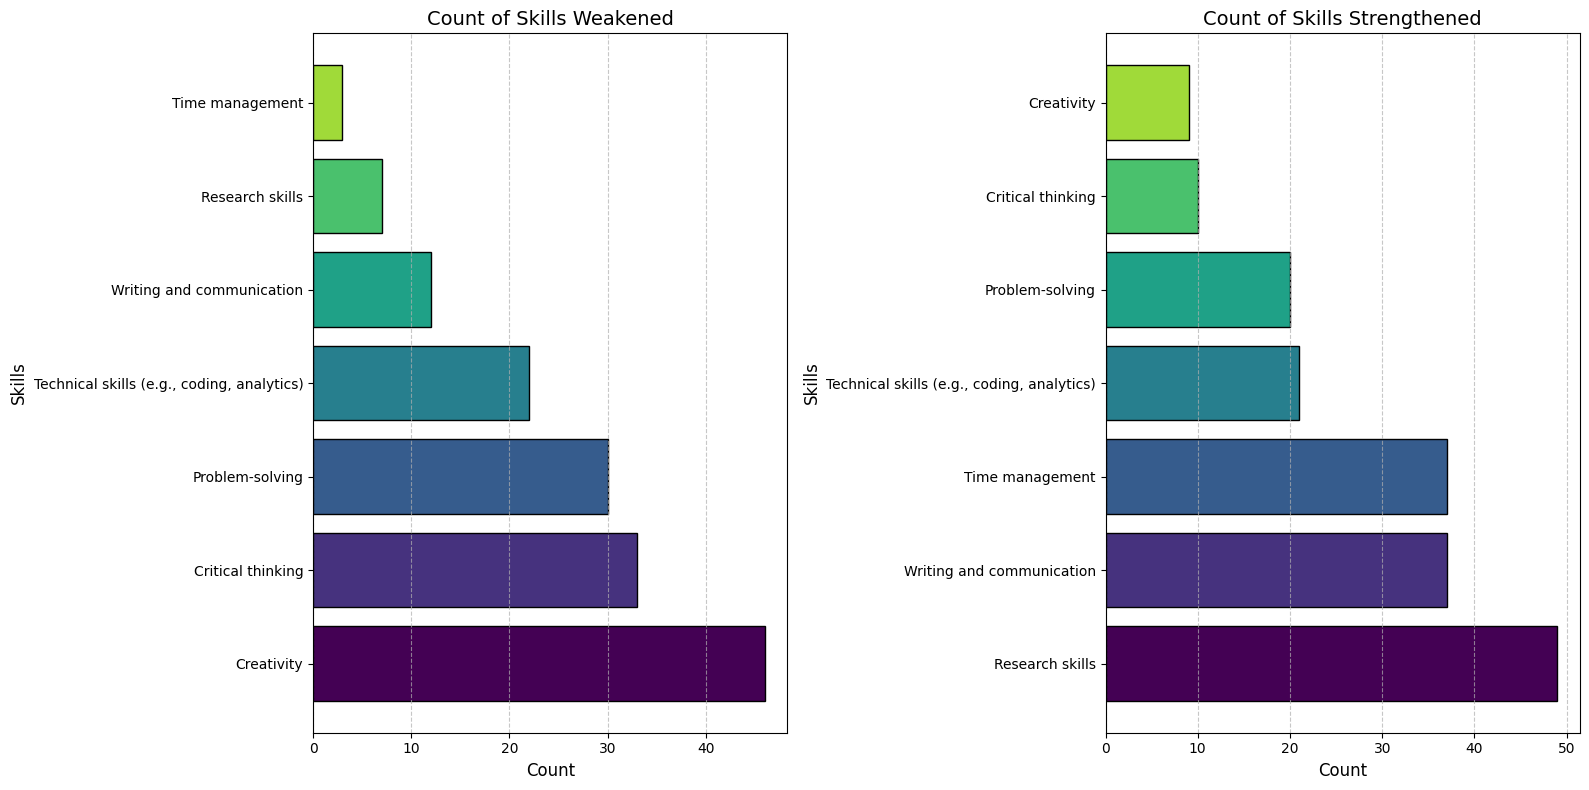

In [107]:
# Split the combined skills into individual skills and count their occurrences

import re

# Helper function to split and count skills
def split_and_count(skills_column):
    if skills_column is not None:
        # Temporarily replace specific phrases to prevent splitting
        temp_column = skills_column.str.replace(r"Technical skills \(.*?\)", "TechnicalSkills", regex=True)
        skills_split = temp_column.dropna().str.split(", ").explode()
        # Revert replaced phrases to their original state
        skills_split = skills_split.str.replace("TechnicalSkills", "Technical skills (e.g., coding, analytics)")
        return skills_split.value_counts()
    else:
        return pd.Series(dtype=int)

# Count for weakened skills
skills_weakened_count = split_and_count(data['Skills_Weakened'])

# Count for strengthened skills
skills_strengthened_count = split_and_count(data['Skills_Improved'])

# Prepare the figure for the two plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Viridis colormap
cmap = plt.cm.viridis

# Plot 1: Skills weakened count
colors_weakened = [cmap(i / len(skills_weakened_count)) for i in range(len(skills_weakened_count))]
axes[0].barh(skills_weakened_count.index, skills_weakened_count, color=colors_weakened, edgecolor='black')
axes[0].set_title("Count of Skills Weakened", fontsize=14)
axes[0].set_xlabel("Count", fontsize=12)
axes[0].set_ylabel("Skills", fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Plot 2: Skills strengthened count
colors_strengthened = [cmap(i / len(skills_strengthened_count)) for i in range(len(skills_strengthened_count))]
axes[1].barh(skills_strengthened_count.index, skills_strengthened_count, color=colors_strengthened, edgecolor='black')
axes[1].set_title("Count of Skills Strengthened", fontsize=14)
axes[1].set_xlabel("Count", fontsize=12)
axes[1].set_ylabel("Skills", fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


#### Insights


- **Dual Impact of AI**: Technical skills appear in both strengthened and weakened categories, highlighting the dual nature of AI's influence. For some individuals, AI serves as a valuable supplement to enhance learning and skill development. For others, excessive reliance on AI may hinder independent growth and weaken these abilities over time.

- **Skill Enhancement**: AI tools have proven highly effective for research and study purposes, with many respondents acknowledging improvements in these areas. Writing and communication skills have also benefited significantly from AI support, revolutionizing how people express ideas. However, a notable segment of respondents believes their writing skills have deteriorated due to over-reliance on AI tools, which may diminish the need for independent effort.

- **Skill Weakening**: A significant number of respondents report that AI has negatively impacted creativity, critical thinking, and problem-solving skills. Over-dependence on AI-generated ideas appears to discourage experimentation and stifle human ingenuity, which thrives on exploration and original thinking. Similarly, critical thinking and problem-solving abilities are compromised when individuals rely on AI to provide ready-made solutions rather than engaging in independent analysis and decision-making. 




### **Correlation Heatmap**

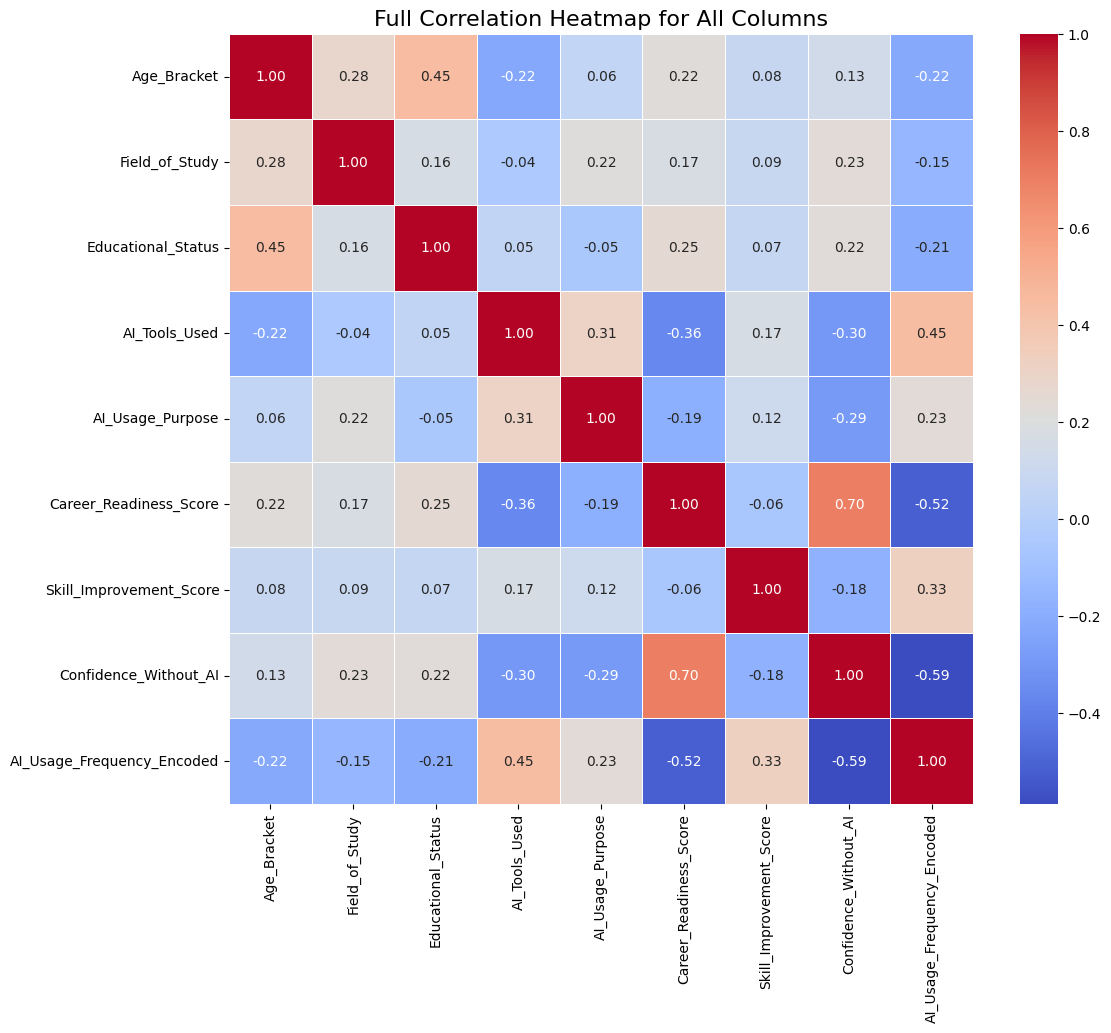

In [108]:
import seaborn as sns

# Drop the Timestamp column
data_encoded = data.drop(columns=["Timestamp","AI_Usage_Frequency"])

# Convert categorical columns to numerical where applicable
categorical_columns = ["Age_Bracket", "Field_of_Study", "Educational_Status", "AI_Tools_Used", "AI_Usage_Purpose"]
data_encoded[categorical_columns] = data_encoded[categorical_columns].apply(lambda col: col.astype('category').cat.codes)

# Compute the correlation matrix
correlation_matrix = data_encoded.corr(numeric_only=True)

# Create a heatmap for all correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Full Correlation Heatmap for All Columns", fontsize=16)
plt.show()




### Insights from the Full Correlation Heatmap:

1. **Key Drivers of Career Readiness**:
   - **Confidence Without AI (0.70)**: Strong positive correlation indicates that individuals with higher self-reliance and the ability to solve problems without AI perceive themselves as more career-ready.
   - **Educational Status (0.25)**: A moderate positive correlation shows that higher educational levels are associated with better career readiness.
   - **AI Usage Purpose (0.22)**: A weak positive correlation suggests that purposeful use of AI aligns slightly with career readiness.

2. **Negative Drivers of Career Readiness**:
   - **AI Tools Used (-0.36)**: A moderate negative correlation suggests that the number of AI tools used may dilute focus, leading to lower perceived career readiness.
   - **AI Usage Frequency (-0.52)**: A strong negative correlation indicates that excessive reliance on AI reduces career readiness, potentially by limiting independent skill development.

3. **Skill Improvement Trends**:
   - **AI Usage Frequency (0.33)**: A positive correlation suggests that frequent AI usage contributes to perceived skill improvement.

4. **Confidence Without AI**:
   - **Career Readiness (0.70)**: Confidence and career readiness are closely tied, reinforcing the importance of self-reliance.
   - **AI Usage Frequency (-0.59)**: A strong negative correlation highlights that frequent AI usage undermines confidence in solving problems independently.



&nbsp;

## **Statistical Analysis**


Lets go back to our research question:

*"Has the advent of AI assistance affected career readiness?"*  

&nbsp;

We have the following hypotheses:

- **Null Hypothesis (H₀):**  
  *The advent of AI assistance has no significant effect on career readiness.*  
  (There is no statistically significant difference in career readiness scores across different levels of AI usage.)

- **Alternative Hypothesis (H₁):**  
  *The advent of AI assistance has significantly affected career readiness.*  
  (There is a statistically significant difference in career readiness scores across different levels of AI usage.)


#### **Test Selection:**


Since the normality assumption is violated, we will use the **Kruskal-Wallis H Test**, a non-parametric alternative to ANOVA that does not assume normality.


In [109]:
from scipy.stats import kruskal

# Extract career readiness scores grouped by AI usage frequency
grouped_data = data.groupby("AI_Usage_Frequency")["Career_Readiness_Score"]


group_values = [values.dropna() for _, values in grouped_data]


# Perform the Kruskal-Wallis H Test
kruskal_stat, kruskal_p = kruskal(*group_values)

# Display the result
test_stat = np.float64(22.737702041194662)
p_value = np.float64(4.5799318111995905e-05)

# Formatting for better readability
print(f"Kruskal-Wallis Test Statistic: {test_stat:.2f}")
print(f"P-value: {p_value:.5f}")



Kruskal-Wallis Test Statistic: 22.74
P-value: 0.00005





**Interpretation:**
- Since the p-value is much smaller than 0.05, we **reject the null hypothesis (H₀)**.
- This means there is a **statistically significant difference** in career readiness scores across different levels of AI usage frequency.





To identify which groups differ significantly, we will perform a post-hoc test, Dunn's test, to pinpoint the specific differences between the groups.

In [110]:
from scikit_posthocs import posthoc_dunn
import pandas as pd

# Perform Dunn's post-hoc test with Bonferroni correction
posthoc_results = posthoc_dunn(group_values, p_adjust='bonferroni')

# Convert the results to a DataFrame for readability
posthoc_df = pd.DataFrame(posthoc_results)

# Define the mapping for the encoded values to AI usage frequencies
encoded_mapping = {
    1: "Daily",
    2: "Occasionally",
    3: "Rarely",
    4: "Weekly"
}

# Update the index and columns of the post-hoc results DataFrame
posthoc_df.index = posthoc_df.index.map(encoded_mapping)
posthoc_df.columns = posthoc_df.columns.map(encoded_mapping)

# Display the updated DataFrame
print(posthoc_df)



                 Daily  Occasionally    Rarely    Weekly
Daily         1.000000      0.003380  0.000089  0.119421
Occasionally  0.003380      1.000000  1.000000  0.649159
Rarely        0.000089      1.000000  1.000000  0.156100
Weekly        0.119421      0.649159  0.156100  1.000000


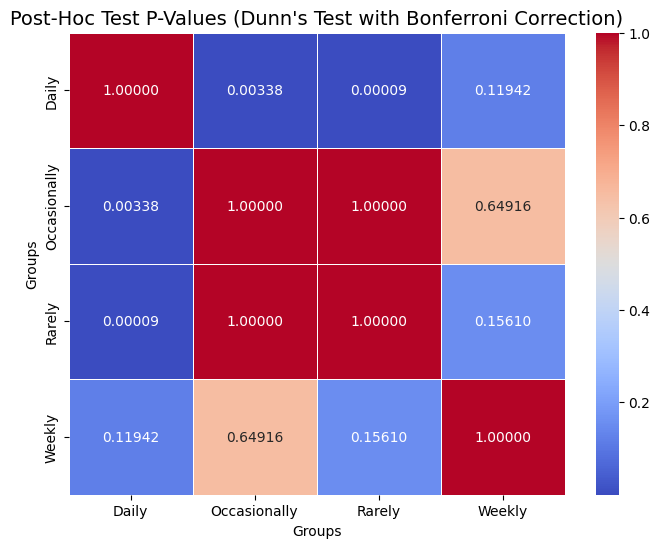

In [111]:


# Create a heatmap for the posthoc results
plt.figure(figsize=(8, 6))
sns.heatmap(posthoc_df, annot=True, cmap="coolwarm", fmt=".5f", linewidths=0.5)
plt.title("Post-Hoc Test P-Values (Dunn's Test with Bonferroni Correction)", fontsize=14)
plt.xlabel("Groups")
plt.ylabel("Groups")
plt.show()




#### Key Takeaways:
1. **Daily vs Occasionally (p = 0.003380)**:
   - Significant difference. Career readiness differs notably between those who use AI daily and occasionally.
   
2. **Daily vs Rarely (p = 0.000089)**:
   - Significant difference. Rare AI users have significantly different career readiness compared to daily users.

3. **Daily vs Weekly (p = 0.119421)**:
   - No significant difference. Career readiness is similar between daily and weekly AI users.

4. **Occasionally vs Rarely, Occasionally vs Weekly, Rarely vs Weekly**:
   - No significant differences, indicating these groups report similar levels of career readiness.



#### Practical Implications:
- **Frequent AI Usage (Daily)** significantly differs from less frequent usage (`Occasionally` and `Rarely`), suggesting that over-reliance on AI may impact career readiness.
- **Occasional and Rare Usage** are more similar, aligning with balanced usage patterns that may preserve self-reliance and skills.



&nbsp;


#### **Summary of Results:**

1. **Kruskal-Wallis H Test Results:**
   - There is a **statistically significant difference** in career readiness scores across different levels of AI usage frequency (p = 0.000046). This indicates that the frequency of AI usage does affect career readiness.

2. **Dunn’s Post-Hoc Test Results:**
   - **Significant Differences:**
     - Career readiness differs significantly between:
       - **Daily vs Occasionally (p = 0.003380)**
       - **Daily vs Rarely (p = 0.000089)**
     - This shows that excessive AI usage (`Daily`) is associated with lower career readiness compared to less frequent usage (`Occasionally` or `Rarely`).
   - **Non-Significant Differences:**
     - No significant difference in career readiness was found between `Daily` and `Weekly`, or between `Occasionally`, `Rarely`, and `Weekly`. This suggests that moderate and infrequent AI usage aligns with similar career readiness levels.

&nbsp;

#### **Conclusion to the Research Question:**
Based on the statistical analysis:
- **Yes**, the advent of AI assistance has significantly affected career readiness.
- The impact depends on the **frequency of AI usage**:
  - Frequent usage (e.g., Daily) is linked to **lower career readiness**, likely due to over-reliance on AI tools.
  - Moderate or infrequent usage (e.g., Occasionally or Rarely) is associated with **higher career readiness**, possibly because these users rely on their own skills while using AI as a supplement.



## **ML Model**

We will be implementing a Linear Regression model to predict career readiness, using the collected data, since it has given the highest R2 value amongst the different models we tested.

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Drop columns that are not needed or contain multiple comma-separated values
data_cleaned = data.drop(columns=["Timestamp", "Skills_Improved", "Skills_Weakened"])

# Encode categorical variables
categorical_columns = ["Age_Bracket", "Field_of_Study", "Educational_Status", 
                       "AI_Usage_Frequency", "AI_Tools_Used", "AI_Usage_Purpose"]

for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].astype('category').cat.codes

# Define features and target
features = data_cleaned.drop(columns=["Career_Readiness_Score"])
target = data_cleaned["Career_Readiness_Score"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 0.66
MSE: 0.64
R² Score: 0.56




### **Interpretation:**
   - The model explains **56% of the variability** in the career readiness scores based on the provided features.
   - This indicates a **moderate level of predictive power**, as slightly more than half of the variance in the target variable is accounted for by the model.


An R² of 0.56 can be considered acceptable, especially in this case where many factors contribute to the outcome.
